<a href="https://colab.research.google.com/github/Livettle/Livettle_project/blob/facial-recognition-v2/Livettle_Facial_Recognition_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import zipfile
# from google.colab import drive

# # First, mount your Google Drive to Colab
# drive.mount('/content/drive')

# # Then, specify the path to your file in your Google Drive
# file_path = "/content/drive/MyDrive/FacialRecognition/archive.zip"

# # Finally, read in your file using ZipFile module
# with zipfile.ZipFile(file_path, 'r') as zip_ref:
#     zip_ref.extractall("/content/dataset/")
  
# print("File extracted successfully")

# import os
# import zipfile
# import gdown

# # Create the directory if it doesn't exist
# if not os.path.exists('/content/dataset'):
#     os.makedirs('/content/dataset')

# # Download the file from Google Drive
# url = 'https://drive.google.com/uc?id=1HxyOHQNTGwRlt8mROVB-kkbL8WrrABWC'
# output = '/content/dataset/archive.zip'
# gdown.download(url, output, quiet=False)

# # Extract the file
# with zipfile.ZipFile(output, 'r') as zip_ref:
#     zip_ref.extractall('/content/dataset/')

# print('File extracted successfully')


Mounted at /content/drive
File extracted successfully


In [ ]:
import csv
import numpy
import zipfile

train_images = []
train_labels = []

categories_count = {}

# Extract the archive.zip file to a directory
with zipfile.ZipFile('/content/drive/MyDrive/FacialRecognition/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/FacialRecognition')

with open('/content/FacialRecognition/train.csv') as train:

    # Read train.csv file
    csv_reader = csv.reader(train)
    next(csv_reader)  # Skip the header

    for row in csv_reader:

        # Append image
        pixels_str = row[1]
        pixels_list = [int(i) for i in pixels_str.split(' ')]
        pixels_list = numpy.array(pixels_list, dtype='uint8')
        image = pixels_list.reshape((48, 48))
        train_images.append(image)

        label_str = row[0]

        # Calculate categories count
        count = 0
        if label_str in categories_count:
            count = categories_count[label_str] + 1
        categories_count[label_str] = count

        # Append label
        label = int(label_str)
        train_labels.append(label)

# Create numpy array of train images and labels
x_train = numpy.array(train_images)
y_train = numpy.array(train_labels)

print('x_train shape: {0}'.format(x_train.shape))
print('y_train shape: {0}'.format(y_train.shape))

x_train shape: (28709, 48, 48)
y_train shape: (28709,)


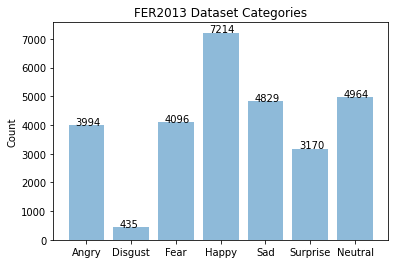

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

categories = ('Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral')
y_pos = numpy.arange(len(categories))

counts = []
for label in range(len(categories)):
    label_str = str(label)
    count = categories_count[label_str]
    counts.append(count)
    plt.text(label - 0.25, count + 15, str(count))

# Draw histogram
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, categories)
plt.ylabel('Count')
plt.title('FER2013 Dataset Categories')

plt.show()

Label is: 0


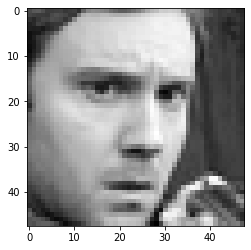

In [ ]:
image = x_train[0]
label = y_train[0]

print('Label is: ' + str(label))
plt.imshow(image, cmap='gray')

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(len(x_train), 48, 48, 1)
x_test = x_test.reshape(len(x_test), 48, 48, 1)

print(x_train.shape)
print(x_test.shape)

(22967, 48, 48, 1)
(5742, 48, 48, 1)


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

print('Tensorflow version: {}'.format(tf.__version__))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras import Model, Input

from tensorflow.keras.preprocessing.image import ImageDataGenerator

Epoch 1/100
359/359 [==============================] - 1415s 4s/step - loss: 1.8130 - accuracy: 0.2505 - val_loss: 2.0640 - val_accuracy: 0.2520 - lr: 0.0010
Epoch 2/100
359/359 [==============================] - 1429s 4s/step - loss: 1.6642 - accuracy: 0.3306 - val_loss: 1.5312 - val_accuracy: 0.3845 - lr: 0.0010
Epoch 3/100
359/359 [==============================] - 1408s 4s/step - loss: 1.5043 - accuracy: 0.4092 - val_loss: 1.5424 - val_accuracy: 0.4260 - lr: 0.0010
Epoch 4/100
359/359 [==============================] - 1380s 4s/step - loss: 1.3925 - accuracy: 0.4669 - val_loss: 1.4094 - val_accuracy: 0.4462 - lr: 0.0010
Epoch 5/100
359/359 [==============================] - 1379s 4s/step - loss: 1.3227 - accuracy: 0.4973 - val_loss: 1.4908 - val_accuracy: 0.4110 - lr: 0.0010
Epoch 6/100
 53/359 [===>..........................] - ETA: 18:28 - loss: 1.2829 - accuracy: 0.5198

In [ ]:
cnn_model = Sequential()

# 1st convolution layer
cnn_model.add(Conv2D(64, input_shape=(48, 48, 1), kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(64, padding='same', kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
cnn_model.add(Dropout(0.3))

# 2nd convolution layer
cnn_model.add(Conv2D(128, padding='same', kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(128, padding='same', kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
cnn_model.add(Dropout(0.3))

# 3rd convolution layer
cnn_model.add(Conv2D(256, padding='same', kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(256, padding='same', kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
cnn_model.add(Dropout(0.3))

# 4th convolution layer
cnn_model.add(Conv2D(512, padding='same', kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(512, padding='same', kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
cnn_model.add(Dropout(0.3))

# Fully connected layer
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.3))

cnn_model.add(Dense(7, activation='softmax'))

# Compile the model
adam = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=adam,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Summary the model
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                        

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10)
reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5)

# Train the model
history = cnn_model.fit(x_train,
                        y_train,
                        batch_size=64,
                        epochs=100,
                        validation_data=(x_test, y_test),
                        callbacks=[early_stopping, reduce_learning_rate])

Epoch 1/100
359/359 [==============================] - 37s 56ms/step - loss: 1.8674 - accuracy: 0.2362 - val_loss: 1.8153 - val_accuracy: 0.2416 - lr: 0.0010
Epoch 2/100
359/359 [==============================] - 19s 52ms/step - loss: 1.6343 - accuracy: 0.3423 - val_loss: 1.5814 - val_accuracy: 0.3976 - lr: 0.0010
Epoch 3/100
359/359 [==============================] - 19s 54ms/step - loss: 1.4796 - accuracy: 0.4158 - val_loss: 1.5547 - val_accuracy: 0.3772 - lr: 0.0010
Epoch 4/100
359/359 [==============================] - 19s 52ms/step - loss: 1.3795 - accuracy: 0.4681 - val_loss: 1.3638 - val_accuracy: 0.4687 - lr: 0.0010
Epoch 5/100
359/359 [==============================] - 19s 54ms/step - loss: 1.3038 - accuracy: 0.5046 - val_loss: 1.3009 - val_accuracy: 0.5084 - lr: 0.0010
Epoch 6/100
359/359 [==============================] - 19s 54ms/step - loss: 1.2580 - accuracy: 0.5295 - val_loss: 1.3164 - val_accuracy: 0.4902 - lr: 0.0010
Epoch 7/100
359/359 [==============================]

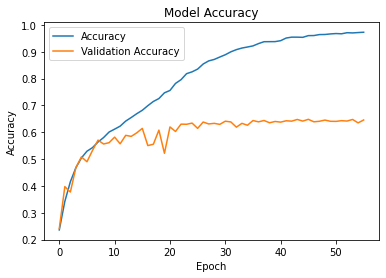

In [ ]:
# Show accuracy diagram
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.show()

In [ ]:
# Evaluate the model before improvement
_, score_before_improvement = cnn_model.evaluate(x_test, y_test)
print('Score before improvement: {}'.format(score_before_improvement))

180/180 [==============================] - 6s 26ms/step - loss: 2.2873 - accuracy: 0.6459
Score before improvement: 0.6459421515464783


In [ ]:
# Generate hard data
hard_images = []
hard_labels = []

# Make predictions
predictions = cnn_model.predict(x_test)
for i, v in enumerate(predictions):
    y_predict = numpy.argmax(v)
    y_real = y_train[i]
    if y_predict != y_real:
        # If predict incorrectly, append to array
        image = x_train[i]
        hard_image = image.reshape(1, 48, 48, 1)
        hard_images.append(image)
        hard_labels.append(y_real)

x_hard = numpy.array(hard_images)
y_hard = numpy.array(hard_labels)

print(x_hard.shape)
print(y_hard.shape)


180/180 [==============================] - 3s 10ms/step
(4727, 48, 48, 1)
(4727,)


In [ ]:
# Train the model on hard data
x_hard_train, x_hard_test, y_hard_train, y_hard_test = train_test_split(x_hard, y_hard, test_size=0.2)
history = cnn_model.fit(x_hard_train,
                        y_hard_train,
                        batch_size=64,
                        epochs=100,
                        validation_data=(x_hard_test, y_hard_test),
                        callbacks=[early_stopping, reduce_learning_rate])

Epoch 1/100
60/60 [==============================] - 4s 69ms/step - loss: 0.0817 - accuracy: 0.9757 - val_loss: 0.0120 - val_accuracy: 0.9947 - lr: 4.3047e-04
Epoch 2/100
60/60 [==============================] - 3s 55ms/step - loss: 0.0505 - accuracy: 0.9828 - val_loss: 0.0120 - val_accuracy: 0.9947 - lr: 4.3047e-04
Epoch 3/100
60/60 [==============================] - 3s 54ms/step - loss: 0.0667 - accuracy: 0.9788 - val_loss: 0.0115 - val_accuracy: 0.9958 - lr: 4.3047e-04
Epoch 4/100
60/60 [==============================] - 3s 54ms/step - loss: 0.0423 - accuracy: 0.9852 - val_loss: 0.0119 - val_accuracy: 0.9979 - lr: 4.3047e-04
Epoch 5/100
60/60 [==============================] - 3s 54ms/step - loss: 0.0330 - accuracy: 0.9889 - val_loss: 0.0118 - val_accuracy: 0.9968 - lr: 4.3047e-04
Epoch 6/100
60/60 [==============================] - 3s 57ms/step - loss: 0.0579 - accuracy: 0.9804 - val_loss: 0.0129 - val_accuracy: 0.9958 - lr: 4.3047e-04
Epoch 7/100
60/60 [===========================

In [ ]:
# Perform data augmentation
data_generator = ImageDataGenerator(featurewise_center=False,
                                    featurewise_std_normalization=False,
                                    rotation_range=10,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=.1,
                                    horizontal_flip=True)
flow = data_generator.flow(x_train, 
                           y_train, 
                           batch_size=64)

# Train the model again to balance out
history = cnn_model.fit(flow,
                        epochs=100,
                        validation_data=(x_test, y_test),
                        callbacks=[early_stopping, reduce_learning_rate])

Epoch 1/100
359/359 [==============================] - 22s 59ms/step - loss: 1.1049 - accuracy: 0.6323 - val_loss: 1.0024 - val_accuracy: 0.6423 - lr: 3.4868e-04
Epoch 2/100
359/359 [==============================] - 22s 62ms/step - loss: 0.9950 - accuracy: 0.6596 - val_loss: 0.9764 - val_accuracy: 0.6489 - lr: 3.4868e-04
Epoch 3/100
359/359 [==============================] - 21s 58ms/step - loss: 0.9516 - accuracy: 0.6748 - val_loss: 0.9767 - val_accuracy: 0.6486 - lr: 3.4868e-04
Epoch 4/100
359/359 [==============================] - 22s 62ms/step - loss: 0.9320 - accuracy: 0.6773 - val_loss: 0.9445 - val_accuracy: 0.6585 - lr: 3.4868e-04
Epoch 5/100
359/359 [==============================] - 21s 57ms/step - loss: 0.9206 - accuracy: 0.6805 - val_loss: 0.9430 - val_accuracy: 0.6581 - lr: 3.4868e-04
Epoch 6/100
359/359 [==============================] - 23s 63ms/step - loss: 0.9066 - accuracy: 0.6814 - val_loss: 0.9416 - val_accuracy: 0.6614 - lr: 3.4868e-04
Epoch 7/100
359/359 [=======

In [ ]:
# Evaluate the model after improvement
_, score_after_improvement = cnn_model.evaluate(x_test, y_test)
print('Score after improvement: {}'.format(score_after_improvement))

180/180 [==============================] - 2s 10ms/step - loss: 1.0258 - accuracy: 0.6670
Score after improvement: 0.6670149564743042


180/180 [==============================] - 1s 8ms/step


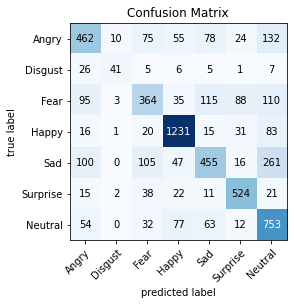

In [ ]:
!pip install -U mlxtend > /dev/null 2>&1

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Make predictions
predictions = cnn_model.predict(x_test)
y_predict = numpy.argmax(predictions, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Display confusion matrix
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, class_names=class_names)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from google.colab import files
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  # Upload JPG file from computer
  uploaded = files.upload()
  if len(uploaded) > 0:
    img_bytes = uploaded[list(uploaded.keys())[0]]
    with open(filename, 'wb') as f:
      f.write(img_bytes)
    return filename
  else:
    return None

In [ ]:
take_photo()

Saving 16578421-photo-of-adorable-young-happy-boy-looking-at-camera- (1).jpg to 16578421-photo-of-adorable-young-happy-boy-looking-at-camera- (1).jpg


'photo.jpg'

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_facial_expression(image_path):
    """Predict facial expression for image"""
    # Open image
    rgb_image = image.load_img(path=image_path,
                            color_mode='grayscale',
                            target_size=(48, 48))
    # Convert to array
    rgb_array = image.img_to_array(rgb_image)
    rgb_array = numpy.expand_dims(rgb_array, axis=0)

    # Show image
    rgb_display = numpy.array(rgb_array, 'float32')
    rgb_display = rgb_display.reshape([48, 48]);
    plt.imshow(rgb_display, cmap='gray')
    plt.show()

    # Make predictions
    rgb_array = rgb_array / 255.0
    prediction = cnn_model.predict(rgb_array)

    # Draw the histogram
    plt.bar(y_pos, prediction[0], align='center', alpha=0.5)
    plt.xticks(y_pos, categories)
    plt.ylabel('Percentage')
    plt.title('Facial Expression Prediction')
    plt.show()

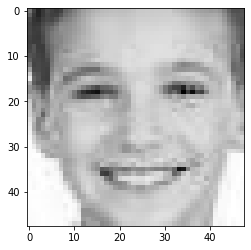

1/1 [==============================] - 0s 58ms/step


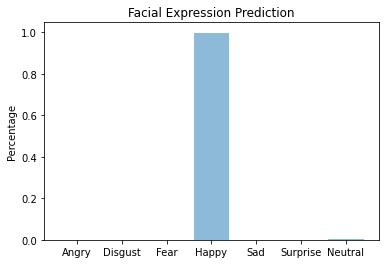

In [ ]:
predict_facial_expression('photo.jpg')